In [21]:
from pydub import AudioSegment
from pydub.playback import play
from scipy.io.wavfile import read
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
import numpy as np

def plot_wav(audio, name = "Sample WAV"):
    plt.plot(audio[:])
    # label the axes
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    # set the title  
    plt.title(name)
    # display the plot
    plt.show()

#Load an audio file
myAudioFile = r"C:\Users\Said Kazimov\Downloads\device1_channel1_20181025163850.wav"
sound1 = AudioSegment.from_file(myAudioFile, format="wav")
sound1.export("original.wav", format="wav").close()
print(sound1.channels)

1


In [22]:
#Invert phase of audio file
sound2 = sound1.invert_phase()
sound2.export("inverted.wav", format="wav").close()
print(sound2)

In [3]:
#Merge two audio files
combined = sound1.overlay(sound2)

#Export merged audio file
combined.export("outAudio.wav", format="wav").close()

In [24]:
#Play audio file :
#should play nothing since two files with inverse phase cancel each other
#mergedAudio = AudioSegment.from_wav("outAudio.wav")

(before_fs, before) = read("original.wav")
edited = []
edited.extend(before)
for i in range(len(before)):
    edited[i] = int(edited[i] / 2.0)
write("nax.wav", before_fs, np.array(edited))
(after_fs, after) = read("inverted.wav")
(result_fs, result) = read("outAudio.wav")

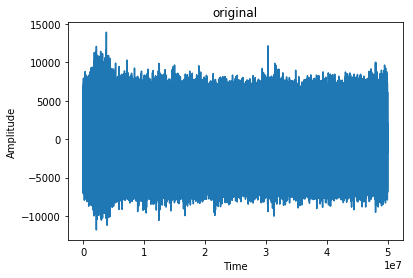

In [5]:
plot_wav(before, "original")

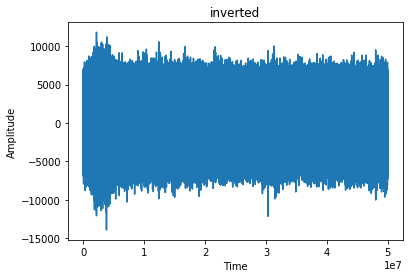

In [6]:
plot_wav(after, "inverted")

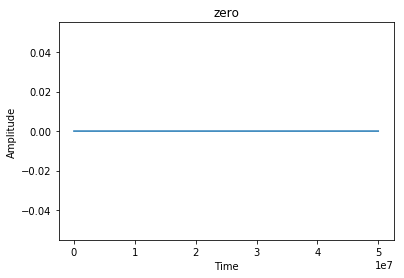

In [6]:
plot_wav(result, "zero")

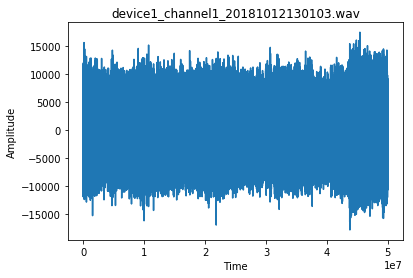

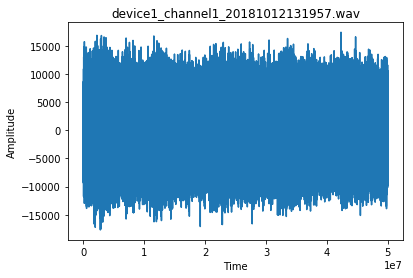

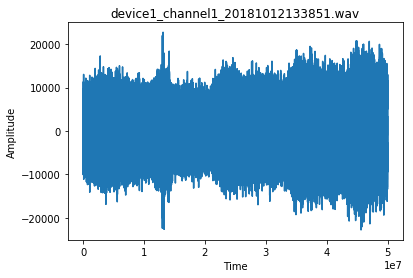

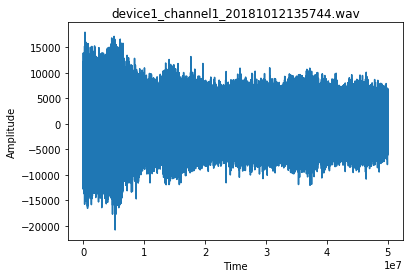

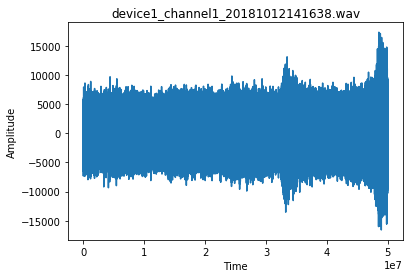

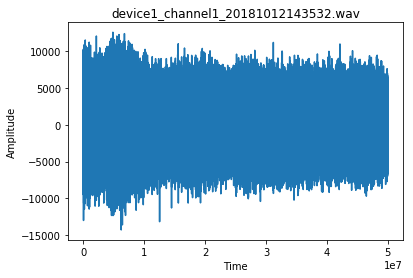

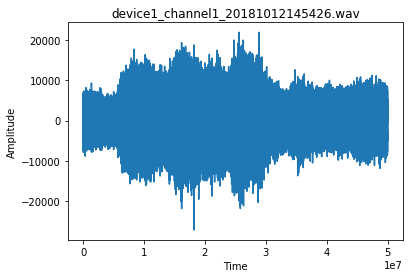

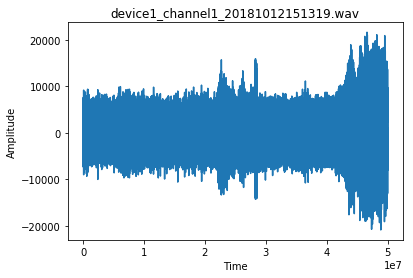

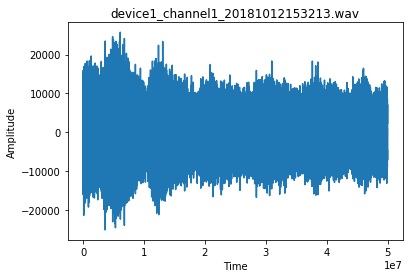

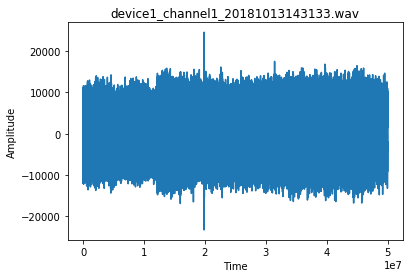

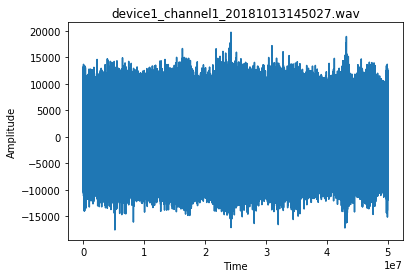

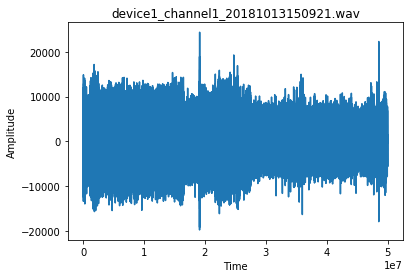

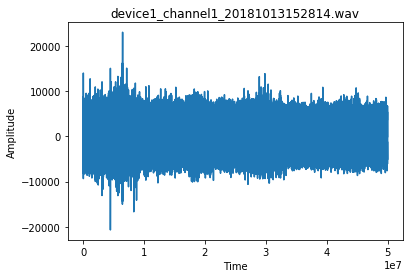

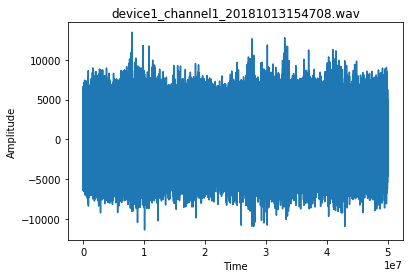

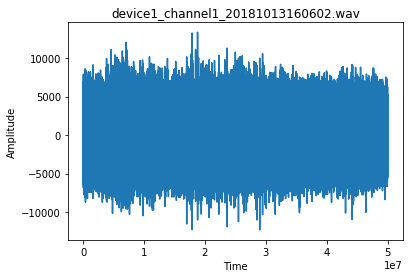

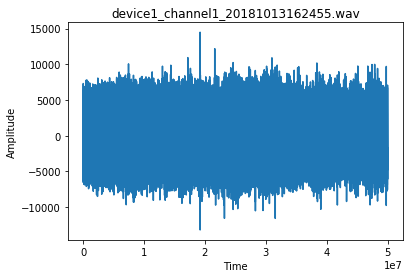

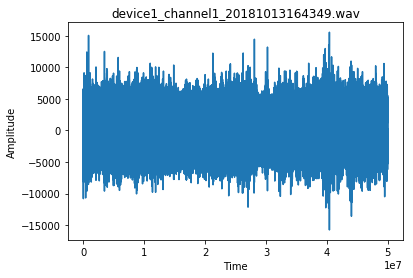

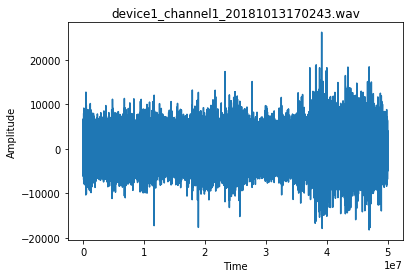

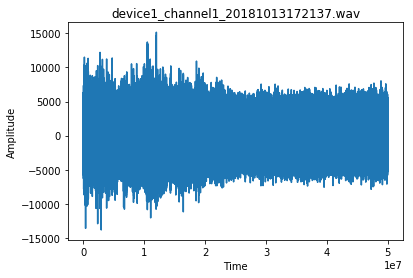

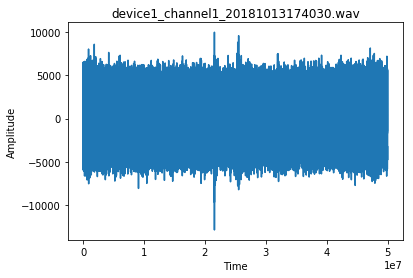

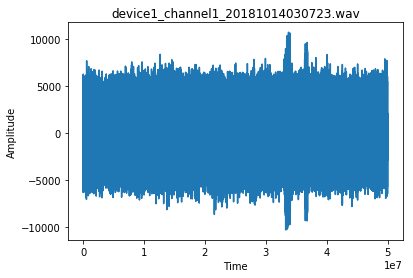

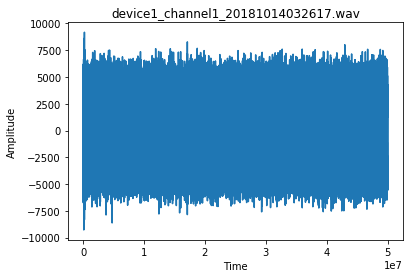

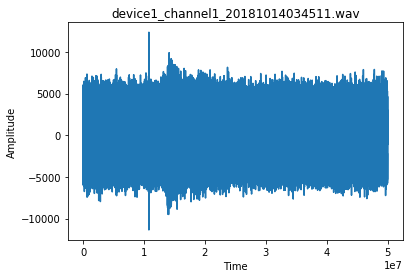

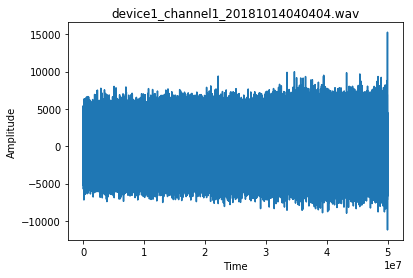

KeyboardInterrupt: 

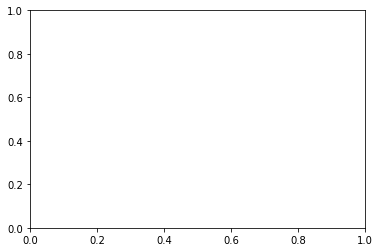

In [7]:
import os
 
path = 'stop'
 
files = os.listdir(path)
for name in files:
    plot_wav(read(os.path.join(path, name))[1], name)

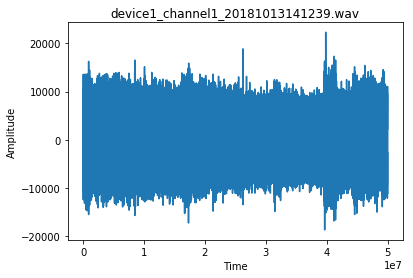

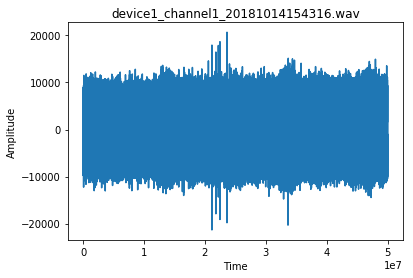

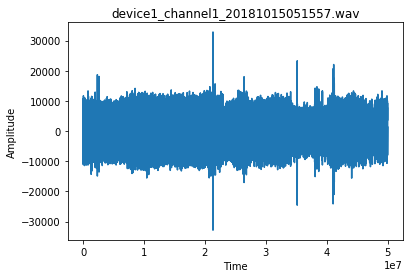

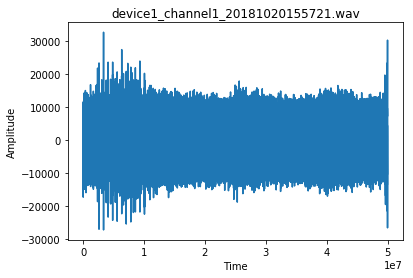

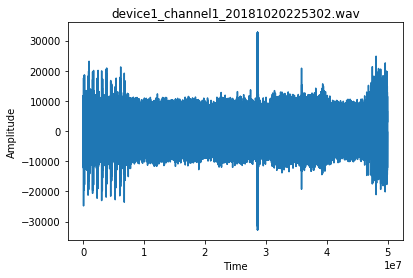

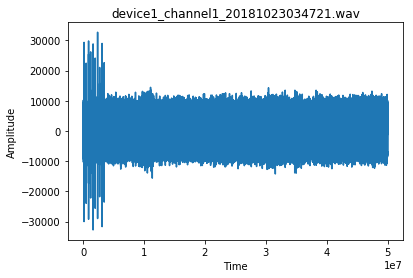

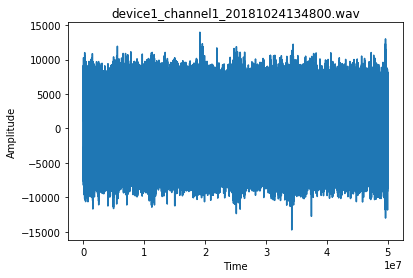

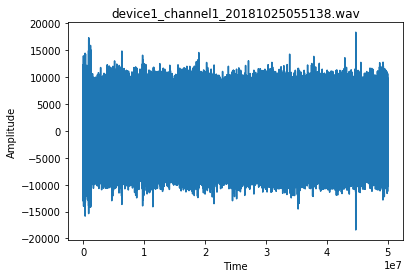

In [3]:
import os
 
path = 'good_stop'
 
files = os.listdir(path)
for name in files:
    plot_wav(read(os.path.join(path, name))[1], name)

In [8]:
import os
 
path = 'stop'
 
files = os.listdir(path)
count = 0
average = [0] * 49996170
for name in files:
    audio = read(os.path.join(path, name))[1]
    print(len(audio))
    count += 1
    for j in range(49996170):
        average[j] += audio[j]


49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170
49996170


In [9]:
avg = []

In [10]:
avg.extend(average)

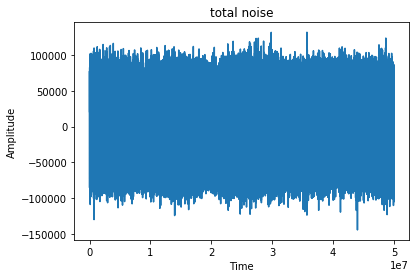

In [15]:
avg = read("total_noise.wav")[1]
plot_wav(avg, "total noise")

In [11]:
sample_rate = read(os.path.join(path, name))[0]
write("total_noise.wav", sample_rate, np.array(avg))

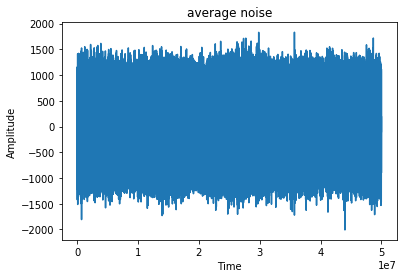

In [12]:
for j in range(len(avg)):
    avg[j] = int(avg[j] * 1.0 / count)
write("avg_noise.wav", sample_rate, np.array(avg))
plot_wav(avg, "average noise")

In [16]:
avg_noise = AudioSegment.from_file("avg_noise.wav", format="wav")
avg_invert = avg_noise.invert_phase()
avg_invert.export("avg_inverted.wav", format="wav").close()

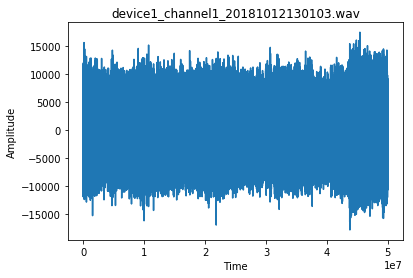

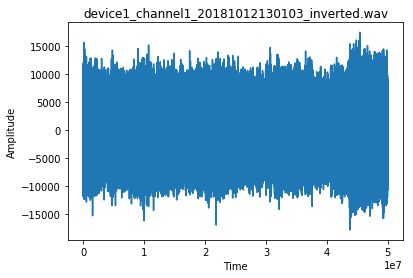

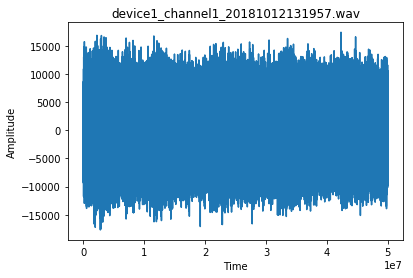

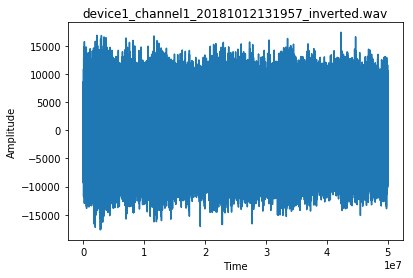

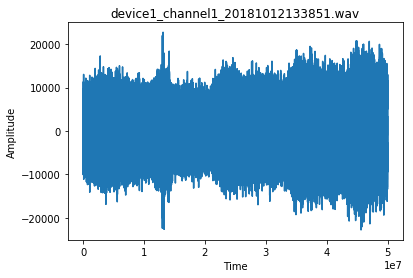

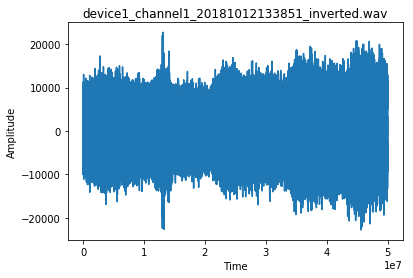

KeyboardInterrupt: 

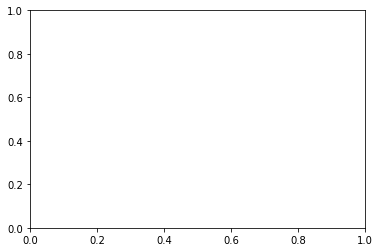

In [20]:
path = 'stop'
inv_path = 'stop/inv'
 
files = os.listdir(path)
for name in files:
    audio = AudioSegment.from_file(os.path.join(path, name), format="wav")
    audio_pure = audio.overlay(avg_invert)
    filename = name[:-4] + "_inverted.wav"
    audio.export(os.path.join(inv_path, filename), format="wav")
    plot_wav(read(os.path.join(path, name))[1], name)
    plot_wav(read(os.path.join(inv_path, filename))[1], filename)